In [241]:
# Only on REDD dataset

# Convert dataset to NILMTK format
from nilmtk.dataset_converters import convert_redd
convert_redd('/home/divansh/Desktop/Coursework/BTP/MultiApplianceAnomalyDetection/datasets/redd-low/', '/home/divansh/Desktop/Coursework/BTP/MultiApplianceAnomalyDetection/datasets/redd-low.h5')


ValueError: The file '/home/divansh/Desktop/Coursework/BTP/MultiApplianceAnomalyDetection/datasets/redd-low.h5' is already opened.  Please close it before reopening in write mode.

In [297]:
from nilmtk import DataSet
from nilmtk.utils import print_dict
refit = DataSet('/home/divansh/Desktop/Coursework/BTP/MultiApplianceAnomalyDetection/datasets/redd-low.h5')
refit.buildings

OrderedDict([(1, Building(instance=1, dataset='REDD')),
             (2, Building(instance=2, dataset='REDD')),
             (3, Building(instance=3, dataset='REDD')),
             (4, Building(instance=4, dataset='REDD')),
             (5, Building(instance=5, dataset='REDD')),
             (6, Building(instance=6, dataset='REDD'))])

In [298]:
elec = refit.buildings[6].elec
print(elec)

MeterGroup(meters=
  ElecMeter(instance=1, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=6, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=6, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=5, building=6, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(instance=6, building=6, dataset='REDD', appliances=[Appliance(type='CE appliance', instance=1)])
  ElecMeter(instance=7, building=6, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=8, building=6, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=9, building=6, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=10, building=6, dataset='REDD', appliances=[Appliance(

In [299]:
ac= elec.nested_metergroups()[0]
fridge = elec[8]
main = elec.mains()
print(ac)

MeterGroup(meters=
  ElecMeter(instance=16, building=6, dataset='REDD', appliances=[Appliance(type='air conditioner', instance=1)])
  ElecMeter(instance=17, building=6, dataset='REDD', appliances=[Appliance(type='air conditioner', instance=1)])
)


In [300]:
main.power_series_all_data().head()

Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.


2011-05-21 15:39:19-04:00    294.23999
2011-05-21 15:39:20-04:00    294.23999
2011-05-21 15:39:21-04:00    292.76001
2011-05-21 15:39:22-04:00    299.01001
2011-05-21 15:39:23-04:00    299.01001
Name: (power, apparent), dtype: float32

In [301]:
fridge.power_series_all_data().head()

2011-05-21 15:39:23-04:00    0.0
2011-05-21 15:39:47-04:00    1.0
2011-05-21 15:39:51-04:00    1.0
2011-05-21 15:39:54-04:00    0.0
2011-05-21 15:39:57-04:00    0.0
Name: (power, active), dtype: float32

In [302]:
ac.power_series_all_data().head()

Loading data for meter ElecMeterID(instance=17, building=6, dataset='REDD')     
Done loading data all meters for this chunk.


2011-05-21 15:39:21-04:00    0.0
2011-05-21 15:39:24-04:00    0.0
2011-05-21 15:39:27-04:00    0.0
2011-05-21 15:39:30-04:00    0.0
2011-05-21 15:39:33-04:00    0.0
Name: (power, active), dtype: float32

In [303]:
print(ac.available_ac_types('power'))
print(fridge.available_ac_types('power'))
print(main.available_ac_types('power'))

['active']
['active']
['apparent']


In [304]:
refit_house6 = refit.buildings[6].elec
type(refit_house6)

nilmtk.metergroup.MeterGroup

In [305]:
train = DataSet('/home/divansh/Desktop/Coursework/BTP/MultiApplianceAnomalyDetection/datasets/redd-low.h5')
test = DataSet('/home/divansh/Desktop/Coursework/BTP/MultiApplianceAnomalyDetection/datasets/redd-low.h5')
building = 6
# yyyy-mm-dd
train.set_window(start="2011-05-24", end="2011-05-27")
test.set_window(start="2011-05-28", end="2011-06-13")

# Get meter data
train_elec = train.buildings[building].elec
test_elec = test.buildings[building].elec


In [306]:
# Check if sum of all appliances equals mains in training data

mains = train_elec.mains()
submeters = train_elec.submeters()
submeter_sum = submeters.total_energy()

Calculating total_energy for ElecMeterID(instance=17, building=6, dataset='REDD') ...   ataset='REDD'), ElecMeterID(instance=17, building=6, dataset='REDD'))) ...   

In [307]:
submeter_sum.head()

active    20.141889
dtype: float64

In [308]:
mains_sum = mains.total_energy()

Calculating total_energy for ElecMeterID(instance=2, building=6, dataset='REDD') ...   

In [309]:
mains_sum.head()

apparent    26.699679
dtype: float64

In [310]:
train_df = next(train_elec.load())

Loading data for meter ElecMeterID(instance=17, building=6, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=17, building=6, dataset='REDD')))     
Done loading data all meters for this chunk.

Done loading data all meters for this chunk.


In [311]:
train_df.head()

physical_quantity          power            
type                      active    apparent
2011-05-24 00:00:00-04:00  469.0  542.065002
2011-05-24 00:00:03-04:00  462.0  547.074951
2011-05-24 00:00:06-04:00  469.0  548.130005
2011-05-24 00:00:09-04:00  460.0  549.690002
2011-05-24 00:00:12-04:00  460.0  549.299988

In [312]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

%matplotlib inline
rcParams['figure.figsize'] = (13, 6)

Loading data for meter ElecMeterID(instance=17, building=6, dataset='REDD')     
Done loading data all meters for this chunk.


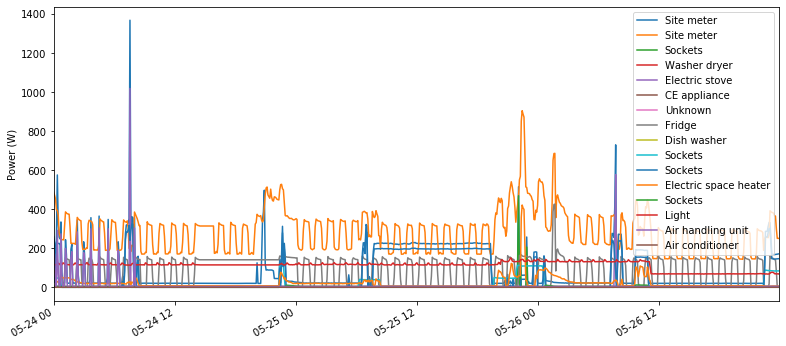

In [313]:
train_elec.plot()

In [314]:
# per_meter_df = {}
# for meter in train_elec.meters():
#     per_meter_df = train_elec.submeters.load()

In [315]:
submeter_data = train_elec.submeters()

### THIS IS THE METHOD

In [316]:
submeter_df = train_elec.submeters().dataframe_of_meters()

Loading data for meter ElecMeterID(instance=17, building=6, dataset='REDD')     
Done loading data all meters for this chunk.


In [317]:
main_df = train_elec.mains().dataframe_of_meters()

In [318]:
main_df.head()

,"(1, 6, REDD)","(2, 6, REDD)"
2011-05-24 00:00:00-04:00,50.040001,494.179993
2011-05-24 00:00:01-04:00,50.040001,494.179993
2011-05-24 00:00:02-04:00,50.169998,489.739990
2011-05-24 00:00:03-04:00,50.209999,502.649994
2011-05-24 00:00:04-04:00,50.209999,502.649994


In [319]:
submeter_df.head()

,"(3, 6, REDD)","(4, 6, REDD)","(5, 6, REDD)","(6, 6, REDD)","(7, 6, REDD)","(8, 6, REDD)","(9, 6, REDD)","(10, 6, REDD)","(11, 6, REDD)","(12, 6, REDD)","(13, 6, REDD)","(14, 6, REDD)","(15, 6, REDD)","(((16, 6, REDD), (17, 6, REDD)),)"
2011-05-24 00:00:00-04:00,5.0,3.0,2.0,0.0,4.0,160.0,0.0,47.0,26.0,90.0,5.0,123.0,4.0,0.0
2011-05-24 00:00:03-04:00,4.0,3.0,2.0,0.0,4.0,159.0,0.0,47.0,26.0,90.0,4.0,119.0,4.0,0.0
2011-05-24 00:00:06-04:00,5.0,3.0,2.0,0.0,4.0,156.0,0.0,47.0,26.0,89.0,4.0,129.0,4.0,0.0
2011-05-24 00:00:09-04:00,5.0,3.0,2.0,0.0,4.0,155.0,0.0,48.0,26.0,86.0,4.0,123.0,4.0,0.0
2011-05-24 00:00:12-04:00,5.0,3.0,2.0,0.0,4.0,155.0,0.0,48.0,26.0,86.0,4.0,123.0,4.0,0.0


In [320]:
first = submeter_df.iloc[0]

In [321]:
print('sum:',first.sum())
ss = np.sqrt((first**2).sum())
print("Sum Squared: ", ss)

sum: 469.0
Sum Squared:  227.6159


In [322]:
submeter_df.columns

Index([                       (3, 6, 'REDD'),
                              (4, 6, 'REDD'),
                              (5, 6, 'REDD'),
                              (6, 6, 'REDD'),
                              (7, 6, 'REDD'),
                              (8, 6, 'REDD'),
                              (9, 6, 'REDD'),
                             (10, 6, 'REDD'),
                             (11, 6, 'REDD'),
                             (12, 6, 'REDD'),
                             (13, 6, 'REDD'),
                             (14, 6, 'REDD'),
                             (15, 6, 'REDD'),
       (((16, 6, 'REDD'), (17, 6, 'REDD')),)],
      dtype='object')

In [323]:
# 8 is fridge and (16,17) is ac
newDf = submeter_df.iloc[:,[5,13]].copy()
#newDf.rename(columns={newDf.columns[0]: "fridge", newDf.columns[1]: "ac"})
print(newDf.columns)
newDf.head()

Index([(8, 6, 'REDD'), (((16, 6, 'REDD'), (17, 6, 'REDD')),)], dtype='object')


,"(8, 6, REDD)","(((16, 6, REDD), (17, 6, REDD)),)"
2011-05-24 00:00:00-04:00,160.0,0.0
2011-05-24 00:00:03-04:00,159.0,0.0
2011-05-24 00:00:06-04:00,156.0,0.0
2011-05-24 00:00:09-04:00,155.0,0.0
2011-05-24 00:00:12-04:00,155.0,0.0


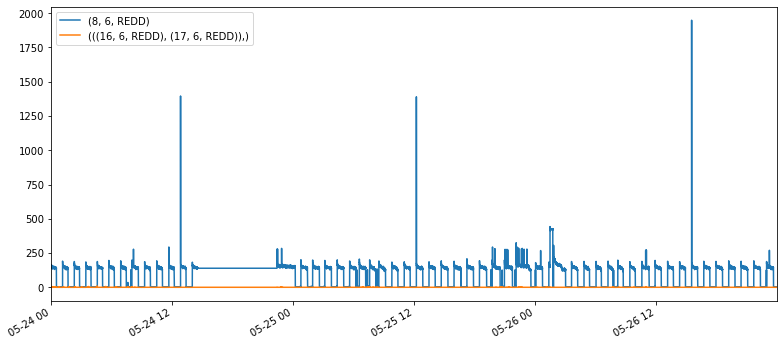

In [324]:
newDf.plot()

In [325]:
newDf.index

DatetimeIndex(['2011-05-24 00:00:00-04:00', '2011-05-24 00:00:03-04:00',
               '2011-05-24 00:00:06-04:00', '2011-05-24 00:00:09-04:00',
               '2011-05-24 00:00:12-04:00', '2011-05-24 00:00:15-04:00',
               '2011-05-24 00:00:18-04:00', '2011-05-24 00:00:21-04:00',
               '2011-05-24 00:00:24-04:00', '2011-05-24 00:00:27-04:00',
               ...
               '2011-05-26 23:59:30-04:00', '2011-05-26 23:59:33-04:00',
               '2011-05-26 23:59:36-04:00', '2011-05-26 23:59:39-04:00',
               '2011-05-26 23:59:42-04:00', '2011-05-26 23:59:45-04:00',
               '2011-05-26 23:59:48-04:00', '2011-05-26 23:59:51-04:00',
               '2011-05-26 23:59:54-04:00', '2011-05-26 23:59:57-04:00'],
              dtype='datetime64[ns, US/Eastern]', length=86400, freq=None)

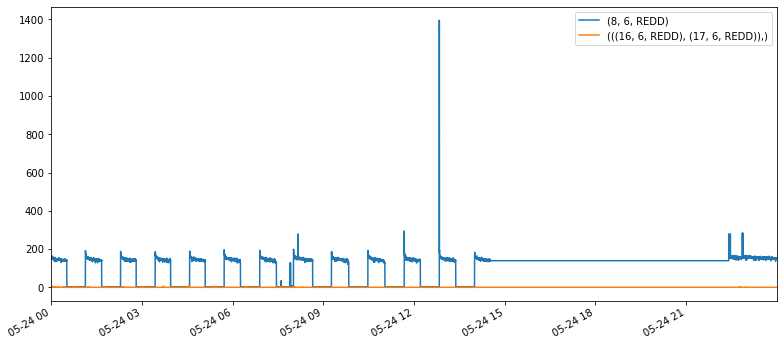

In [326]:
newDf['2011-05-24'].plot()

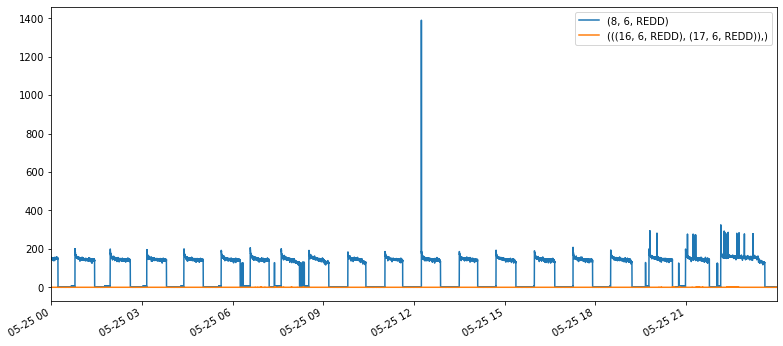

In [327]:
newDf['2011-05-25'].plot()

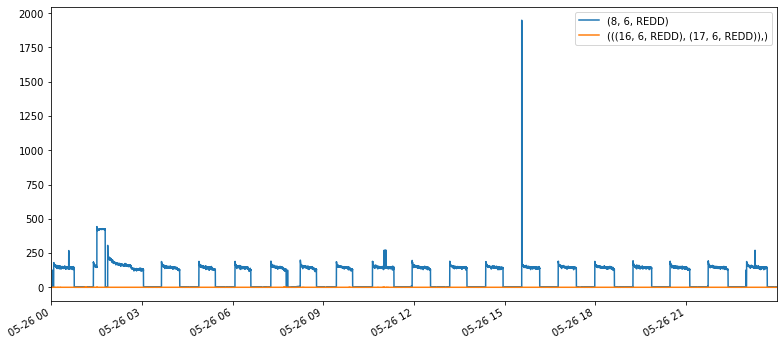

In [328]:
newDf['2011-05-26'].plot()

(0, 500)

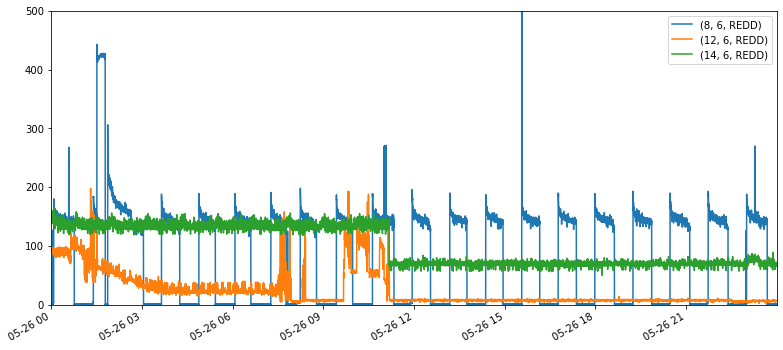

In [342]:
ax1 = submeter_df[submeter_df.columns[[5,9,11]]]['2011-05-26'].plot()
ax1.set_ylim(0,500)

In [330]:
train_elec

MeterGroup(meters=
  ElecMeter(instance=1, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=6, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=6, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=5, building=6, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(instance=6, building=6, dataset='REDD', appliances=[Appliance(type='CE appliance', instance=1)])
  ElecMeter(instance=7, building=6, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=8, building=6, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=9, building=6, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=10, building=6, dataset='REDD', appliances=[Appliance(

In [331]:
submeter_df_test = test_elec.submeters().dataframe_of_meters()

Loading data for meter ElecMeterID(instance=17, building=6, dataset='REDD')     
Done loading data all meters for this chunk.


(0, 500)

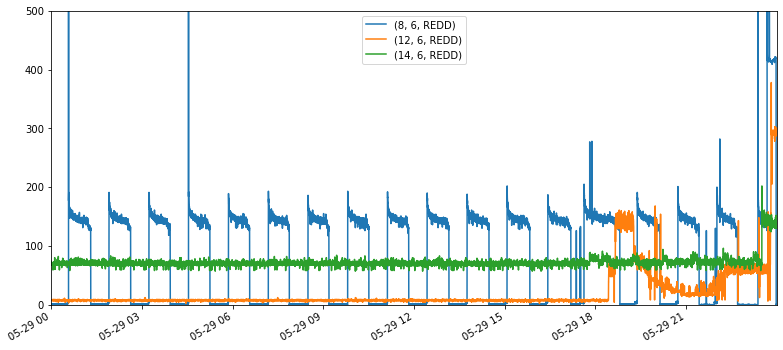

In [345]:
ax = submeter_df_test[submeter_df_test.columns[[5,9,11]]]['2011-05-29'].plot()
ax.set_ylim(0,500)

In [ ]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall
